In [15]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42)

In [190]:
train = pd.read_csv('../data/train.csv')
train_gender = pd.read_csv('../data/train_gender.csv')

In [191]:
audio_len = []

for path in train.path:
    data, sample_rate = librosa.load('../data/'+path[2:], sr=16000)
    audio_len.append(data.shape[0]/float(sample_rate))

/tmp/ipykernel_26868/698645183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(audio_len)


<Axes: ylabel='Density'>

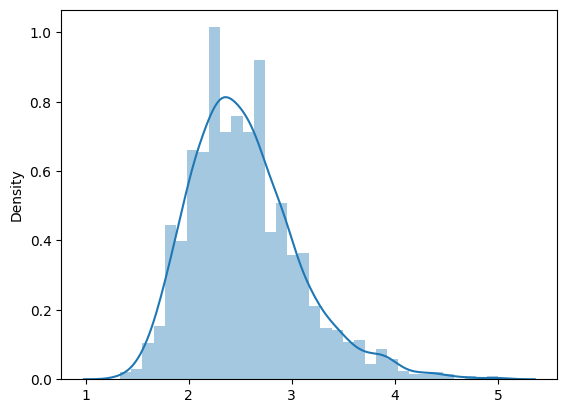

In [192]:
sns.distplot(audio_len)

In [184]:
mfccs=[]
def get_audio(datas, label):
    # Audio Sample Directory
    num = int(random.uniform(0,5000))
    for data in datas.iloc[:num].itertuples():
        if data.label==label:
            audio, sample_rate = librosa.load('../data/'+data.path[2:], sr=16000)
    
    # Plot the audio wave
    dsp.waveshow(audio,sr=sample_rate)
    plt.show()
    
    # Show the widget
    return Audio(data=audio,rate=sample_rate)

/tmp/ipykernel_26868/3435771908.py:8: FutureWarning: Pass size=80000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  audio = librosa.util.fix_length(audio, 80000)


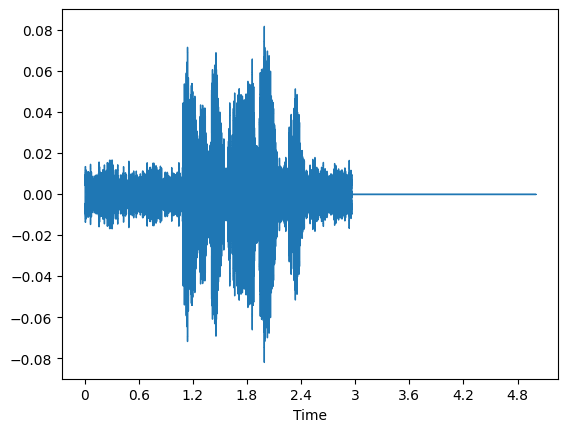

In [185]:
#0:angry 1:fear 2:sad 3:disgust 4:neutral 5:happy
get_audio(train, 1)

In [193]:
mfccs=[]
for data in train.itertuples():
    audio, sample_rate = librosa.load('../data/'+data.path[2:], sr=16000)
    audio = librosa.util.fix_length(audio, 80000)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    y_feature = []
    # 추출된 MFCC들의 평균을 Feature로 사용
    for e in mfcc:
        y_feature.append(np.mean(e))
    mfccs.append(y_feature)


mfcc_df = pd.DataFrame(mfccs, columns=['mfcc_'+str(x) for x in range(1,41)])
mfcc_df.to_csv('../data/mfccs.csv')

/tmp/ipykernel_26868/1189723752.py:4: FutureWarning: Pass size=80000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  audio = librosa.util.fix_length(audio, 80000)
